Erin Ruby and Courtney Solano

# Assignment 3 - more pitching#
#### CSCI 4831 - Sabermetrics ####
#### Instructor: Hoenigman ####
#### Due: Wednesday, March 6 by 3pm ####

**Use any of the datasets we've learned about so far to complete this assignment.** 

**Submit your notebook to the Assignment 3 link on Canvas. Include all csv files that you generate with your submission.**

## Pitching ###
In Assignment 2, you evaluated 5 Rockies pitchers by comparing pitch selection and movement of their pitches at home and away. In this next assignment, you will also evaluate pitchers in different environments or at different times. The specifics of how you do that are up to you. Your assignment needs to fulfill the following high-level objectives.

### 1. Pitchers to compare ###
(10 pts) You need pitchers that you will compare. Examples include groups of pitchers compared to other groups, an individual pitcher compared to another individual, or one pitcher compared to himself at different times in his career. 

### 2. Reason for your comparison ###
(10 pts) You need to have a reason for why you think the comparison is meaningful. For example, you might compare the star pitcher from a hitters park to the star pitcher at a pitchers park. This comparison could be meaningful to evaluate the effect of the run-scoring environment on their approach to pitching. A comparison that wouldn't be meaningful is average pitcher A compared to average pitcher B, both on average teams. That's not a result that anyone would care about. 

### 3. Basis for comparison ###
(30 pts) You need to describe how the pitchers will be compared and then implement your comparison. Examples of comparison include pitch movement and selection, BABIP, BABIP on specific pitches, OBP in different environments. Choose at least three criteria for pitcher comparison. 

### 4. Data for comparison ###
(10 pts) Focus on starting pitchers only because you will have more data. Use 3-5 years of data for each pitcher or time period. A pitcher will need to have at least 3 years of data to be used in this assignment.

### 5. Analysis ###
(20 pts) Your comparison needs to include a basic statistical analysis, such as t-tests, z-tests, and/or confidence intervals. You also need at least one visual presentation of your data, such as a histogram, bar chart, or line graph. Your visual should be appropriate for the type of data being displayed.

### 6. Presentation ###
(20 pts) You need a 2-page writeup explaining what you did and your results. Your presentation should have clearly marked sections for 

* Introduction
* Problem Definition
* Data
* Results

### Other notes ###
* Proofread your writeup for typos and proper grammar. 
* If you compare pitch movement, use the statcast fields for vx0, vz0, ax, az, plate_x, plate_z variables instead of pfx_x, pfx_z, I'm not sure what those do.
* Include all code and the writeup together in one notebook.

In [1]:
from pybaseball import statcast
from pybaseball import playerid_reverse_lookup
from pybaseball.lahman import *
from pybaseball.retrosheet import *
import pandas as pd
import numpy as np
import math
download_lahman() 
pd.set_option('display.max_columns', 5000)

In [2]:
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline

In [3]:
april2018 = pd.read_csv("data/2018/dataApril2018.csv")
may2018 = pd.read_csv("data/2018/dataMay2018.csv")
june2018 = pd.read_csv("data/2018/dataJune2018.csv")
july2018 = pd.read_csv("data/2018/dataJuly2018.csv")
aug2018 = pd.read_csv("data/2018/dataAug2018.csv")
sep2018 = pd.read_csv("data/2018/dataSept2018.csv")
oct2018 = pd.read_csv("data/2018/dataOct2018.csv")
df2018 = pd.concat([april2018,may2018,june2018,july2018,aug2018,sep2018,oct2018])

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:

df2016 = pd.read_csv("data/2016/data2016.csv")

In [6]:
april2017 = pd.read_csv("data/2017/dataApril2017.csv")
may2017 = pd.read_csv("data/2017/dataMay2017.csv")
june2017 = pd.read_csv("data/2017/dataJune2017.csv")
july2017 = pd.read_csv("data/2017/dataJuly2017.csv")
aug2017 = pd.read_csv("data/2017/dataAug2017.csv")
sep2017 = pd.read_csv("data/2017/dataSept2017.csv")
oct2017 = pd.read_csv("data/2017/dataOct2017.csv")
df2017 = pd.concat([april2017,may2017,june2017,july2017,aug2017,sep2017,oct2017])

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [7]:
df1618 = pd.concat([df2016, df2017, df2018])


# Comments from Rhonda #
I wonder if you could consider whether the previous play increased win expectancy as a way to weight the WE on the next play. You would use (WE_Current/WE_previous) to give you a value around 1. Greater than 1 means they improved and <1 means they decreased. Use that to weight the next WE calculation. I have no idea what that would do, but it could be interesting. It might be noisy and you might want to consider WE over the previous 2 plays instead of 1, or previous 3 plays.

# Explanation of statistic #
blah blah blah

# Demonstration #
Your demonstration needs to be in the form of an application showing how the statistic
works. You will need to have all of the necessary data in your application, and a visual presentation
that is clear to the users. An example of a demonstration is a website where users can select players
and see how the stat is calculated for those players. You might also do a mobile app. If you took
3308 or the mobile app class in ATLAS, this project will be a great application of the content
covered in those classes. You can also produce a Jupyter notebook. I’ll give up to 5pts extra credit
for anyone who produces an application more advanced than a Jupyter notebook.


# Evaluation of statistic #
As part of your demonstration, you should include an evaluation of how your statistic
compares to other statistics. This could be in the form of presenting other statistics along with
your own. You may want to include a correlation score between your stat and other related stats.

# Presentation #
For the presentation, please produce a 5-7 minute video that describes your project. You
could do a screencast showing how your application works. If you do a website, you should also
include the web address.

In [247]:
rockiesHome = df1116.copy().loc[((df1116['home_team']=='COL')&(df1116['inning_topbot']=='Top')
                                 &(df1116['inning']==1)
                                 &(df1116['outs_when_up']==0))].reset_index().drop_duplicates('pitcher')

In [138]:
pitcherID = []
for i in range(len(rockiesHome)):
    pitcherID.append(rockiesHome.iloc[i]['pitcher'])
playerid_reverse_lookup(pitcherID)


Gathering player lookup table. This may take a moment.


,name_last,name_first,key_mlbam,key_retro,key_bbref,key_fangraphs,mlb_played_first,mlb_played_last
0,anderson,brett,474463,andeb004,anderbr04,8223,2009.0,2018.0
1,anderson,tyler,542881,andet002,anderty01,12880,2016.0,2018.0
2,belisle,matt,279571,belim001,belisma01,1837,2003.0,2018.0
3,bergman,christian,548357,bergc001,bergmch01,10925,2014.0,2018.0
4,bettis,chad,518452,bettc001,bettich01,10587,2013.0,2018.0
5,butler,eddie,572750,butle001,butleed01,13453,2014.0,2018.0
6,chacin,jhoulys,468504,chacj001,chacijh01,2608,2009.0,2018.0
7,chatwood,tyler,543022,chatt001,chatwty01,4338,2011.0,2018.0
8,de la rosa,jorge,407822,delaj001,rosajo01,2047,2004.0,2018.0
9,flande,yohan,456071,flany001,flandyo01,5057,2014.0,2016.0


In [ ]:
# matt belisle Cincinnati Reds (2005-2008) COL (2009-2014) belisma01 

# jhoulys chacin COL (2009–2014 - Arizona Diamondbacks (2015) chacijh01

# jeff francis (2012-2013) Cincinnati Reds (2014) francje01
                    
# jordan lyles houston astros 2011-2013 rockies 2014-2016 lylesjo01
                    
# drew pomeranz (2011-2013) Oakland Athletics (2014–2015) pomerdr01 519141

# Data #
For each of these 5 pitchers, I calculated their FIP, and BABIP. I then compared those values, as well as their ERA to when they played on the Rockies to when they played on another team. I define good pitchers as having a FIP of 3.5 or below (from https://library.fangraphs.com/pitching/fip/), a BABIP of 0.3 or below (from http://m.mlb.com/glossary/advanced-stats/babip) and an ERA below 4.0 (from https://en.wikipedia.org/wiki/Earned_run_average). I predict that pitchers stats get better once they leave the Rockies because Coors field is hard to pitch at compared to most other parks. Better stats means decreasing the value.  
**Matt Belisle**: All of his stats decreased from when he pitched on the Cincinnati Reds to his time on the Rockies. He got traded to the Rockies after he played for the Reds.   
**Jhoulys Chacin**: All of his stats decreased when he got traded to the Arizona Diamondbacks after he played for the Rockies.   
**Jeff Francis**: His FIP increased from 4.535 to 5.858 after he was traded to the Cincinnati Reds from the Rockies. His other two stats decreased.   
**Jordan Lyles**: All of his stats decreased after he got traded to the Rockies from the Houston Astros.  
**Drew Pomeranz**: All of Drew's stats decreased significantly after he got traded from the Rockies to the Oakland Athletics.  
These results show that the team that a player is on does not really affect how good a pitcher is. There are both examples of being traded to and from the Rockies. Time seems to be the biggest factor, each pitcher got better the longer he played.  
The 3 pitchers I will examine further are:  
**Jeff Francis** - he was the only pitcher who had a stat get worse. He left the Rockies to go to the Cincinnati Reds. The park factor for Cincinnati is very similar to Coors field, at 1.13.  
**Jordan Lyles** - he got traded to the Rockies from the Houston Astros. Houston is a neutral park, with a park factor for runs per game of 0.98.  
**Drew Pomeranz** - he got traded from the Rockies to the Oakland Athletics. Oakland is a pitcher's park, with a park factor of 0.84.  

In [232]:
pitchers = pitching()
masterDF = master()
pitchers = pitchers.loc[(pitchers['playerID']=='belisma01') | (pitchers['playerID']=='lylesjo01') | 
                        (pitchers['playerID']== 'chacijh01')| (pitchers['playerID']=='francje01')|
                       (pitchers['playerID']== 'pomerdr01')]
pitchers['FIP'] = ((13*pitchers['HR']+3*(pitchers['HBP']+pitchers['BB'])-2*pitchers['SO'])/
                    (pitchers['IPouts']/3))+3.2
pitchers['AB'] = pitchers['BFP'] - pitchers['BB'] - pitchers['HBP'] - pitchers['SH'] - pitchers['SF'] - pitchers['IBB']
pitchers['BABIP'] = (pitchers['H'] - pitchers['HR'])/(pitchers['AB'] - pitchers['SO'] - pitchers['HR'] + pitchers['SF'])
# pitchers.sort_values('yearID', ascending = False).dropna()


In [222]:
# matt belisle Cincinnati Reds (2005-2008) COL (2009-2014) belisma01 
belisleRED = pitchers.copy().loc[(pitchers['yearID']>=2005)&(pitchers['yearID']<=2008) &(pitchers['playerID']=='belisma01')]
belisleRED = belisleRED.groupby(['playerID']).agg({'FIP':'mean', 'BABIP':'mean', 'ERA':'mean'})
print ("Matt Belisle 2005-2008 Cincinnati Reds Stats: ")
print (belisleRED.head())
belisleCOL = pitchers.copy().loc[(pitchers['yearID']>=2009) & (pitchers['yearID']<=2014)& (pitchers['playerID']=='belisma01')]
belisleCOL = belisleCOL.groupby(['playerID']).agg({'FIP':'mean', 'BABIP':'mean', 'ERA':'mean'})
print ("Matt Belisle. 2009-2014 Colorado Rockies Stats: ")
print (belisleCOL.head())


Matt Belisle 2005-2008 Cincinnati Reds Stats: 
                FIP     BABIP     ERA
playerID                             
belisma01  4.735692  0.334398  5.1525
Matt Belisle. 2009-2014 Colorado Rockies Stats: 
                FIP    BABIP  ERA
playerID                         
belisma01  3.496884  0.32792  4.1


In [224]:
# jhoulys chacin COL (2009–2014 - Arizona Diamondbacks (2015) chacijh01

chacinCOL = pitchers.copy().loc[(pitchers['yearID']>=2009)&(pitchers['yearID']<=2014) &(pitchers['playerID']=='chacijh01')]
chacinCOL = chacinCOL.groupby(['playerID']).agg({'FIP':'mean', 'BABIP':'mean', 'ERA':'mean'})
print ("Jhoulys Chacin 2009-2014 Colorado Rockies Stats: ")
print (chacinCOL.head())
chacinARI = pitchers.copy().loc[(pitchers['yearID']==2015) & (pitchers['playerID']=='chacijh01')]
chacinARI = chacinARI.groupby(['playerID']).agg({'FIP':'mean', 'BABIP':'mean', 'ERA':'mean'})
print ("Jhoulys Chacin. 2015 Arizona Diamondbacks Stats: ")
print (chacinARI.head())




Jhoulys Chacin 2009-2014 Colorado Rockies Stats: 
                FIP    BABIP    ERA
playerID                           
chacijh01  4.475547  0.27966  4.185
Jhoulys Chacin. 2015 Arizona Diamondbacks Stats: 
           FIP     BABIP   ERA
playerID                      
chacijh01  4.7  0.266667  3.38


In [230]:
# jeff francis Rockies (2012-2013) Cincinnati Reds (2014) francje01

francisCOL = pitchers.copy().loc[(pitchers['yearID']>=2012)&(pitchers['yearID']<=2013) &(pitchers['playerID']=='francje01')]
francisCOL = francisCOL.groupby(['playerID']).agg({'FIP':'mean', 'BABIP':'mean', 'ERA':'mean'})
print ("Jeff Francis 2012-2013 Colorado Rockies Stats: ")
print (francisCOL.head())
francisRED = pitchers.copy().loc[(pitchers['yearID']==2014) & (pitchers['playerID']=='francje01')]
francisRED = francisRED.groupby(['playerID']).agg({'FIP':'mean', 'BABIP':'mean', 'ERA':'mean'})
print ("JJeff Francis 2014 Cincinnati Reds Stats: ")
print (francisRED.head())



Jeff Francis 2012-2013 Colorado Rockies Stats: 
                FIP     BABIP    ERA
playerID                            
francje01  4.534941  0.354201  5.925
JJeff Francis 2014 Cincinnati Reds Stats: 
                FIP     BABIP       ERA
playerID                               
francje01  5.858333  0.243275  5.626667


In [374]:
# jordan lyles houston astros 2011-2013 rockies 2014-2016 lylesjo01

lylesAST = pitchers.copy().loc[(pitchers['yearID']>=2011)&(pitchers['yearID']<=2013) &(pitchers['playerID']=='lylesjo01')]
lylesAST = lylesAST.groupby(['playerID']).agg({'FIP':'mean', 'BABIP':'mean', 'ERA':'mean'})
print ("Jordan Lyles 2011-2013 Houston Astros Stats: ")
print (lylesAST.head())
lylesCOL = pitchers.copy().loc[(pitchers['yearID']>=2014)&(pitchers['yearID']<=2016) & (pitchers['playerID']=='lylesjo01')]
lylesCOL = lylesCOL.groupby(['playerID']).agg({'FIP':'mean', 'BABIP':'mean', 'ERA':'mean'})
print ("Jordan Lyles 2014-2016 Colorado Rockies Stats: ")
print (lylesCOL.head())

Jordan Lyles 2011-2013 Houston Astros Stats: 
                FIP     BABIP       ERA
playerID                               
lylesjo01  4.684656  0.312334  5.346667
Jordan Lyles 2014-2016 Colorado Rockies Stats: 
                FIP     BABIP  ERA
playerID                          
lylesjo01  4.258118  0.319382  5.1


In [234]:
# drew pomeranz rockies (2011-2013) Oakland Athletics (2014–2015) pomerdr01

pomeranzCOL = pitchers.copy().loc[(pitchers['yearID']>=2011)&(pitchers['yearID']<=2013) &(pitchers['playerID']=='pomerdr01')]
pomeranzCOL = pomeranzCOL.groupby(['playerID']).agg({'FIP':'mean', 'BABIP':'mean', 'ERA':'mean'})
print ("Drew Pomeranz 2011-2013 Colorado Rockies Stats: ")
print (pomeranzCOL.head())
pomeranzRED = pitchers.copy().loc[(pitchers['yearID']>=2014)&(pitchers['yearID']<=2015) & (pitchers['playerID']=='pomerdr01')]
pomeranzRED = pomeranzRED.groupby(['playerID']).agg({'FIP':'mean', 'BABIP':'mean', 'ERA':'mean'})
print ("Drew Pomeranz 2014-2015 Oakland Athletics Stats: ")
print (pomeranzRED.head())



Drew Pomeranz 2011-2013 Colorado Rockies Stats: 
                FIP     BABIP   ERA
playerID                           
pomerdr01  4.765421  0.327657  5.52
Drew Pomeranz 2014-2015 Oakland Athletics Stats: 
                FIP     BABIP    ERA
playerID                            
pomerdr01  3.763027  0.261063  3.005


# Data # 
For each of the 3 pitchers, I grouped their pitch types from their time on the Rockies, and grouped their pitch types when they were on the other team. I plotted a histogram of these results for each pitcher. The histogram has each pitch type and the percentage he pitched that type over the years. After that, I obtained 95% confidence intervals for the difference in pitch type percentages of his most used pitch type. If zero exists in the confidence interval, there is no statistical difference between the two percentages and I can conclude that he did not change his pitching approach after switching teams. 

In [388]:
# jeff francis (rockies 2012-2013) Cincinnati Reds (2014) francje01 433585
francisCOL = df1116.copy().loc[(df1116['game_year']>=2012)&(df1116['game_year']<=2013)
                                  &(df1116['pitcher'] == 433585)].reset_index()



francisCIN = df1116.copy().loc[(df1116['game_year']==2014)&(df1116['pitcher'] == 433585)].reset_index()
                                  
francisCOLgroup = francisCOL.groupby(['game_year', 'player_name', 'pitch_name']).agg({'pitch_name':'count'})

francisCOLgroup.head(100)


pitch_name
game_year player_name  pitch_name                  
2012.0    Jeff Francis 4-Seam Fastball          216
                       Changeup                 422
                       Curveball                351
                       Intentional Ball          16
                       Pitch Out                  1
                       Sinker                   791
2013.0    Jeff Francis 4-Seam Fastball           24
                       Changeup                 264
                       Curveball                272
                       Intentional Ball           5
                       Sinker                   679

In [389]:
francisCINgroup = francisCIN.groupby(['game_year', 'player_name', 'pitch_name']).agg({'pitch_name':'count'})

francisCINgroup.head(100)

pitch_name
game_year player_name  pitch_name                  
2014.0    Jeff Francis 4-Seam Fastball            3
                       Changeup                  38
                       Curveball                 64
                       Intentional Ball           4
                       Sinker                   151
                       Slider                    52

# Results #
**Jeff Francis**  
Francis got traded from the Rockies to the Cincinnati Reds. The park factor for Cincinnati is very similar to Coors field, at 1.13. Since both parks are considers hitters parks, (hard to pitch at), it can be predicted that his approach to pitching would stay the same.  
His most used pitch both when he played for the Rockies and when he played for Cincinnati was the *sinker*. The 95% CI for the difference in proportion is [$-0.0588,0.0576$]. Since 0 is contained within this CI, there is no significant evidence that he changed his pitching approach when he was traded from the Rockies to the Reds. 

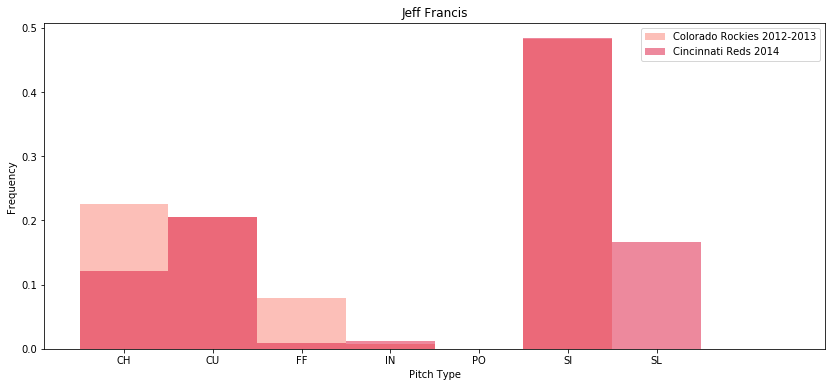

In [390]:
# jeff francis (rockies 2012-2013) Cincinnati Reds (2014) francje01 433585
dfOld = francisCOL.copy()
dfNew = francisCIN.copy()
fig,ax = plt.subplots(figsize=(14,6))
ax.hist(dfOld.pitch_type,
        bins = np.arange(9)-0.5,
        color = "salmon",
        alpha = 0.5,
        label = "Colorado Rockies 2012-2013",
        density = True)
ax.hist(dfNew.pitch_type,
        bins = np.arange(9)-0.5,
        color = "crimson",
        alpha = 0.5,
        label = "Cincinnati Reds 2014",
        density = True);
ax.set_title("Jeff Francis");
ax.set_xlabel("Pitch Type");
ax.set_ylabel("Frequency")
ax.legend();

In [391]:
# jeff francis (rockies 2012-2013) Cincinnati Reds (2014) francje01 433585

colPitch = francisCOL.copy().groupby(['pitch_name']).agg({'pitch_name':'count'})
cinPitch = francisCIN.copy().groupby(['pitch_name']).agg({'pitch_name':'count'})

z = stats.norm.ppf(0.025)
# # print (z)
m = colPitch.sum()
# print (m)
m = 3041
# n = pomeranzCOL.copy().groupby(['pitch_name']).agg({'pitch_name':'count'}).get_group('pitch_name')
n = 1470

p1 = n/m

a = 151
b = cinPitch.sum()
# print ("B", b)
b = 312
p2 = a/b
upper = (p1-p2) + z*(math.sqrt(((p1*(1-p1))/m)+((p2*(1-p2))/b)))
lower = (p1-p2) - z*(math.sqrt(((p1*(1-p1))/m)+((p2*(1-p2))/b)))
print ("Difference in Proportion [{:0.4f},{:0.4f}]".format(upper, lower))
# colPitch.head(10)

Difference in Proportion [-0.0588,0.0576]


In [393]:
# jordan lyles houston astros 2011-2013 rockies 2014-2016 lylesjo01 543475
lylesCOL = df1116.copy().loc[(df1116['game_year']>=2014)&(df1116['game_year']<=2016)
                                  &(df1116['pitcher'] == 543475)].reset_index()



lylesHOU = df1116.copy().loc[(df1116['game_year']>=2011)&(df1116['game_year']<=2013)
                             &(df1116['pitcher'] == 543475)].reset_index()
                                  
lylesCOLgroup = lylesCOL.groupby(['game_year', 'player_name', 'pitch_name']).agg({'pitch_name':'count'})

lylesCOLgroup.head(100)

pitch_name
game_year player_name  pitch_name                  
2014.0    Jordan Lyles 2-Seam Fastball          676
                       4-Seam Fastball          682
                       Changeup                 165
                       Curveball                176
                       Intentional Ball           4
                       Slider                   392
2015.0    Jordan Lyles 2-Seam Fastball          154
                       4-Seam Fastball          301
                       Changeup                  96
                       Curveball                 56
                       Intentional Ball           2
                       Slider                   112
2016.0    Jordan Lyles 2-Seam Fastball          220
                       4-Seam Fastball          337
                       Changeup                  77
                       Curveball                 86
                       Intentional Ball           8
                       Slider                   210

In [394]:
lylesHOUgroup = lylesHOU.groupby(['game_year', 'player_name', 'pitch_name']).agg({'pitch_name':'count'})

lylesHOUgroup.head(100)

pitch_name
game_year player_name  pitch_name                  
2011.0    Jordan Lyles 2-Seam Fastball          188
                       4-Seam Fastball          619
                       Changeup                 187
                       Curveball                197
                       Intentional Ball           1
                       Slider                   377
2012.0    Jordan Lyles 2-Seam Fastball          539
                       4-Seam Fastball          885
                       Changeup                 116
                       Curveball                446
                       Intentional Ball          11
                       Pitch Out                  6
                       Slider                   359
2013.0    Jordan Lyles 2-Seam Fastball          698
                       4-Seam Fastball          729
                       Changeup                 234
                       Curveball                450
                       Intentional Ball           3
                       Pitch Out                  1
                       Slider                   328

# Results #
**Jordan Lyles**   
He got traded to the Rockies from the Houston Astros. Houston is a neutral park, with a park factor for runs per game of 0.98. We could predict that Lyles would change his style of pitching because had to learn how the balls react at Coors field.  
His most used pitch both when he played for the Rockies and Houston Astros was the *4-Seam Fastball*. The 95% CI for the difference in proportion is [$-0.0180,0.0205$]. Since 0 is contained within this CI, there is no significant evidence that he changed his pitching approach when he was traded from the Astros to the Rockies. 

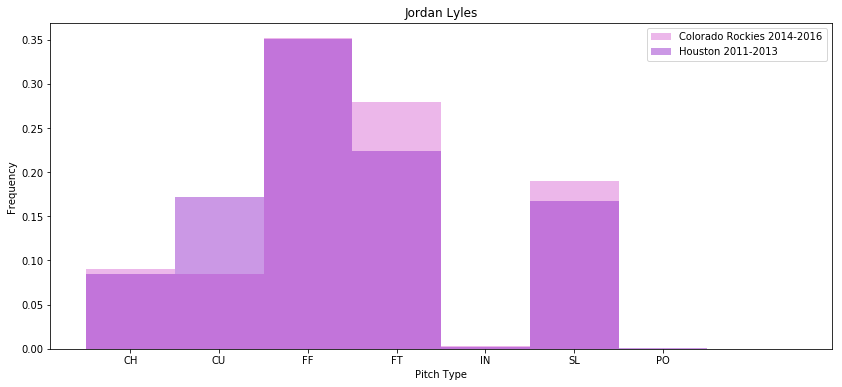

In [349]:
# jordan lyles houston astros 2011-2013 rockies 2014-2016 lylesjo01 543475
dfOld = lylesCOL.copy()
dfNew = lylesHOU.copy()
fig,ax = plt.subplots(figsize=(14,6))
ax.hist(dfOld.pitch_type,
        bins = np.arange(9)-0.5,
        color = "orchid",
        alpha = 0.5,
        label = "Colorado Rockies 2014-2016",
        density = True)
ax.hist(dfNew.pitch_type,
        bins = np.arange(9)-0.5,
        color = "darkorchid",
        alpha = 0.5,
        label = "Houston Astros 2011-2013",
        density = True);
ax.set_title("Jordan Lyles");
ax.set_xlabel("Pitch Type");
ax.set_ylabel("Frequency")
ax.legend();

In [395]:
colPitch = lylesCOL.copy().groupby(['pitch_name']).agg({'pitch_name':'count'})
houPitch = lylesHOU.copy().groupby(['pitch_name']).agg({'pitch_name':'count'})

z = stats.norm.ppf(0.025)
# # print (z)
m = colPitch.sum()
# print (m)
m = 3754
# n = pomeranzCOL.copy().groupby(['pitch_name']).agg({'pitch_name':'count'}).get_group('pitch_name')
n = 1320

p1 = n/m

a = 2233
b = houPitch.sum()
# print ("B", b)
b = 6374
p2 = a/b
upper = (p1-p2) + z*(math.sqrt(((p1*(1-p1))/m)+((p2*(1-p2))/b)))
lower = (p1-p2) - z*(math.sqrt(((p1*(1-p1))/m)+((p2*(1-p2))/b)))
print ("Difference in Proportion [{:0.4f},{:0.4f}]".format(upper, lower))
# houPitch.head()

Difference in Proportion [-0.0180,0.0205]


In [296]:
# drew pomeranz rockies (2011-2013) Oakland Athletics (2014–2015) pomerdr01 519141
pomeranzCOL = df1116.copy().loc[(df1116['game_year']>=2011)&(df1116['game_year']<=2013)
                                  &(df1116['pitcher'] == 519141)].reset_index()



pomeranzOAK = df1116.copy().loc[(df1116['game_year']>=2014)&(df1116['game_year']<=2015)
                             &(df1116['pitcher'] == 519141)].reset_index()
                                  
pomeranzCOLgroup = pomeranzCOL.copy().groupby(['game_year', 'player_name', 'pitch_name']).agg({'pitch_name':'count'})

pomeranzCOLgroup.head(200)

pitch_name
game_year player_name   pitch_name                  
2011.0    Drew Pomeranz 2-Seam Fastball           69
                        4-Seam Fastball          135
                        Changeup                  20
                        Knuckle Curve             40
                        Slider                     2
2012.0    Drew Pomeranz 2-Seam Fastball          233
                        4-Seam Fastball         1110
                        Changeup                 107
                        Curveball                  1
                        Intentional Ball           5
                        Knuckle Curve            243
                        Pitch Out                  1
2013.0    Drew Pomeranz 2-Seam Fastball           31
                        4-Seam Fastball          247
                        Changeup                  13
                        Intentional Ball           4
                        Knuckle Curve            122

In [278]:
pomeranzOAKgroup = pomeranzOAK.copy().groupby(['game_year', 'player_name', 'pitch_name']).agg({'pitch_name':'count'})

pomeranzOAKgroup.head(100)

pitch_name
game_year player_name   pitch_name                  
2014.0    Drew Pomeranz 2-Seam Fastball          298
                        4-Seam Fastball          517
                        Changeup                  11
                        Knuckle Curve            304
2015.0    Drew Pomeranz 2-Seam Fastball          103
                        4-Seam Fastball          724
                        Changeup                  31
                        Cutter                     2
                        Intentional Ball           1
                        Knuckle Curve            397
                        Pitch Out                  1

# Results #
**Drew Pomeranz**  
Pomeranz got traded from the Rockies to the Oakland Athletics. Oakland is a pitcher's park, with a park factor of 0.84. This is the biggest change of park factor of the 5 pitchers I looked at. It should be expected that he changed up his style of pitching after the trade. He went from a hitters park to a pitchers park. 
His most used pitch both when he played for the Rockies and when he played for the Oakland Athletics was also the *4-Seam Fastball*. The 95% CI for the difference in proportion is [$0.0787,0.1345$]. Since 0 is not contained within this CI, there is significant evidence that he changed his pitching approach when he was traded from the Rockies to the Athletics. 

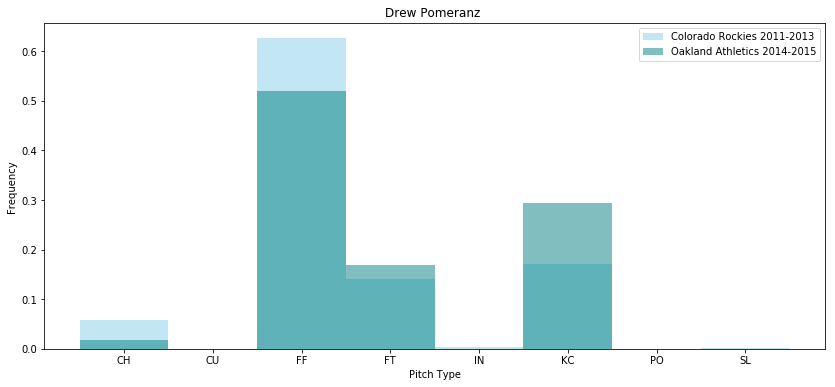

In [373]:
# drew pomeranz rockies (2011-2013) Oakland Athletics (2014–2015) pomerdr01 519141
dfOld = pomeranzCOL.copy()
dfNew = pomeranzOAK.copy()
fig,ax = plt.subplots(figsize=(14,6))
ax.hist(dfOld.pitch_type,
        bins = np.arange(9)-0.5,
        color = "skyblue",
        alpha = 0.5,
        label = "Colorado Rockies 2011-2013",
        density = True)
ax.hist(dfNew.pitch_type,
        bins = np.arange(9)-0.5,
        color = "teal",
        alpha = 0.5,
        label = "Oakland Athletics 2014-2015",
        density = True);
ax.set_title("Drew Pomeranz ");
ax.set_xlabel("Pitch Type");
ax.set_ylabel("Frequency")
ax.legend();

In [386]:
colPitch = pomeranzCOL.copy().groupby(['pitch_name']).agg({'pitch_name':'count'})
oakPitch = pomeranzOAK.copy().groupby(['pitch_name']).agg({'pitch_name':'count'})

z = stats.norm.ppf(0.025)
# # print (z)
m = colPitch.sum()
m = 2383
# print (m)
# n = pomeranzCOL.copy().groupby(['pitch_name']).agg({'pitch_name':'count'}).get_group('pitch_name')
n = 1492

p1 = n/m

a = 1241
b = oakPitch.sum()
# print ("B", b)
b = 2389
p2 = a/b
upper = (p1-p2) + z*(math.sqrt(((p1*(1-p1))/m)+((p2*(1-p2))/b)))
lower = (p1-p2) - z*(math.sqrt(((p1*(1-p1))/m)+((p2*(1-p2))/b)))
print ("Difference in Proportion [{:0.4f},{:0.4f}]".format(upper, lower))

# oakPitch.head(10)


Difference in Proportion [0.0787,0.1345]


# Conclusion #
Do pitchers change their approach to pitching after they are traded to a new team? I conclude that they do not. One pitcher, Drew Pomeranz appeared to change his approach to pitching after his trade. This was an extreme case, going from Coors field that has a park factor of 1.26 to Oakland that has a park factor of 0.84. There are 26% more runs scored at Coors field than average, and there at 16% less runs scored at Oakland than average. As I concluded in Assignment 2, park factors do not affect how a pitcher pitches a ball. Pitchers get better the longer they play the game. Another factor besides time that could result in change in pitching style is the coaching staff. Each team has a different style of coaching and could alter a pitchers style.  They continue to work on certain types of pitches and that is what they become good/comfortable with pitching. 